### Lab Assignment 4: Text Classification with Deep Learning
### Author: Ravi Teja Kondeti
### ASU ID: 1234434879
### Date: Feb 22, 2025

In [6]:
# Code Cell 1 (5%) - Import Libraries and Load Data
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint

# Load dataset (first 5000 rows)
data = pd.read_csv("/content/restaurant_reviews_az.csv").head(5000)

# Extract reviews and labels
X_texts = data['text']
y_labels = data['Sentiment']

In [7]:
# Code Cell 2 (10%) - TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X_texts).toarray()

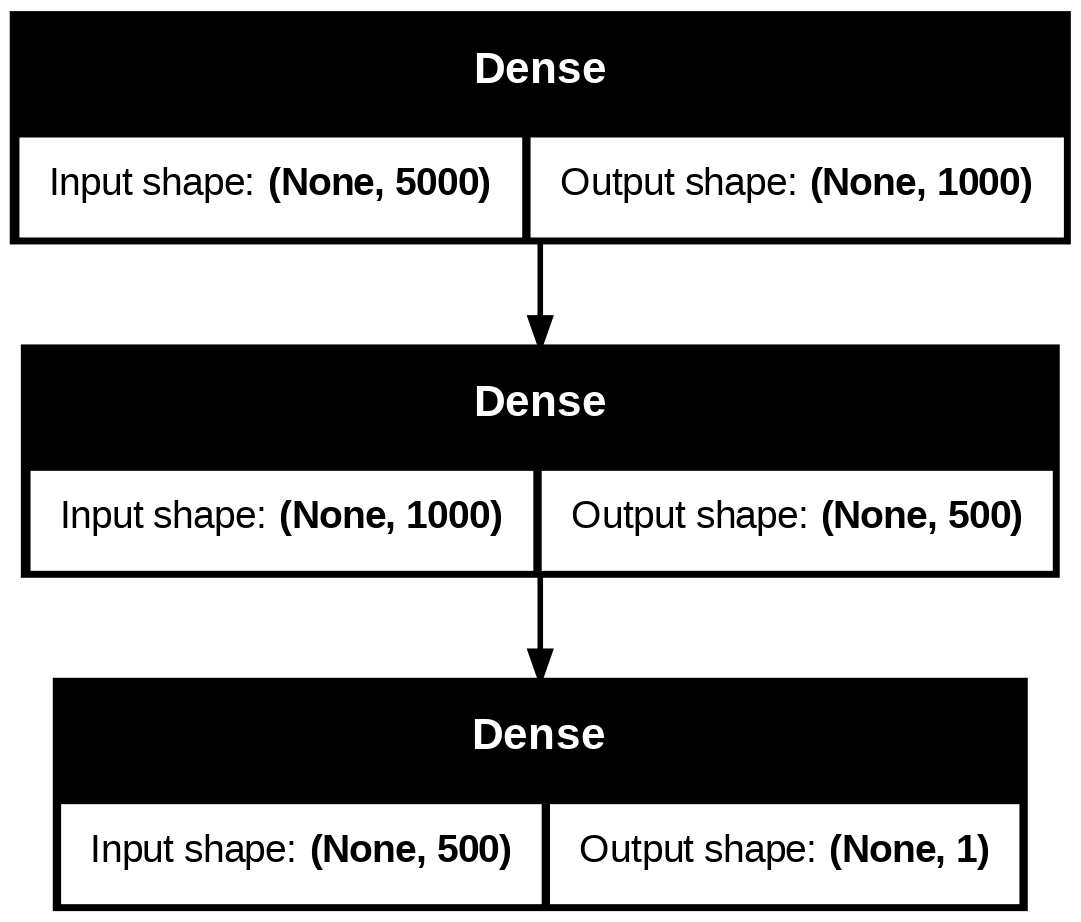

In [9]:
# Code Cell 3 (10%) - Define ANN Model
model = Sequential([
    Input(shape=(5000,)),
    Dense(1000, activation='relu'),
    Dense(500, activation='relu'),
    Dense(1, activation='sigmoid')])
# Compile Model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Visualize Model
keras.utils.plot_model(model, show_shapes=True)


In [10]:
# Code Cell 4 (10%) - Train ANN Model
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_labels, test_size=0.25, random_state=42)

checkpoint = ModelCheckpoint('best_ann_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=8, callbacks=[checkpoint])

Epoch 1/3
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7183 - loss: 0.6388

469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.7183 - loss: 0.6387 - val_accuracy: 0.7256 - val_loss: 0.5859
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7086 - loss: 0.5989 - val_accuracy: 0.7256 - val_loss: 0.5803
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7171 - loss: 0.5865 - val_accuracy: 0.7256 - val_loss: 0.5747


In [11]:
# Code Cell 5 (10%) - Classify Input Reviews
input_reviews = [
    "The service is good, but location is hard to find. Sanitation is not very good with old facilities. Food served tasted extremely fishy, making us difficult to even finish it.",
    "The restaurant is definitely one of my favorites and of my family as well. I was especially impressed with my visit a few days ago. The place is clean, and you just need to wait for fewer than 10 minutes to get food served. And of course, the food is absolutely delicious!",
    "I appreciated the friendly staff. The food was good, not amazing. The service was not prompt but almost acceptable. A reliable spot for a regular meal, but nothing extraordinary."
]

input_tfidf = vectorizer.transform(input_reviews).toarray()
predictions = model.predict(input_tfidf)

for review, pred in zip(input_reviews, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Review: The service is good, but location is hard to find. Sanitation is not very good with old facilities. Food served tasted extremely fishy, making us difficult to even finish it.
Predicted Sentiment: Positive

Review: The restaurant is definitely one of my favorites and of my family as well. I was especially impressed with my visit a few days ago. The place is clean, and you just need to wait for fewer than 10 minutes to get food served. And of course, the food is absolutely delicious!
Predicted Sentiment: Positive

Review: I appreciated the friendly staff. The food was good, not amazing. The service was not prompt but almost acceptable. A reliable spot for a regular meal, but nothing extraordinary.
Predicted Sentiment: Positive



In [13]:
# Code Cell 6 (10%) - Reload Data and Apply Word Embeddings
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and Convert to Sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_texts)
X_seq = tokenizer.texts_to_sequences(X_texts)
X_padded = pad_sequences(X_seq, maxlen=50)

In [14]:
# Code Cell 7 (10%) - Train ANN Model with Word Embeddings
model2 = Sequential([
    Input(shape=(50,)),
    Dense(1000, activation='relu'),
    Dense(500, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

checkpoint2 = ModelCheckpoint('best_ann_embedding_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

history2 = model2.fit(X_padded, y_labels, validation_split=0.25, epochs=3, batch_size=8, callbacks=[checkpoint2])

Epoch 1/3
459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3125 - loss: nan

469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3120 - loss: nan - val_accuracy: 0.2736 - val_loss: nan
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2831 - loss: nan - val_accuracy: 0.2736 - val_loss: nan
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2831 - loss: nan - val_accuracy: 0.2736 - val_loss: nan


In [ ]:
# Text Cell 8 (5%) - Comparison of TF-IDF vs Word Embedding
"""
Observations:
- TF-IDF captures frequency-based representations but lacks semantic meaning.
- Word embeddings capture contextual relationships, making them more effective for complex sentiment analysis.
"""

In [15]:
# Code Cell 9 (10%) - Train RNN Model
from tensorflow.keras.layers import SimpleRNN, Embedding

model_rnn = Sequential([
    Embedding(input_dim=5000, output_dim=300, input_length=50),
    SimpleRNN(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
checkpoint_rnn = ModelCheckpoint('best_rnn_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

history_rnn = model_rnn.fit(X_padded, y_labels, validation_split=0.25, epochs=3, batch_size=8, callbacks=[checkpoint_rnn])


Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6978 - loss: 0.6364

469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6979 - loss: 0.6363 - val_accuracy: 0.7264 - val_loss: 0.5857
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.7119 - loss: 0.5979 - val_accuracy: 0.7264 - val_loss: 0.5823
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7086 - loss: 0.5976 - val_accuracy: 0.7264 - val_loss: 0.5806


In [16]:
# Code Cell 10 (10%) - Train LSTM Model
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=300, input_length=50),
    LSTM(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
checkpoint_lstm = ModelCheckpoint('best_lstm_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

history_lstm = model_lstm.fit(X_padded, y_labels, validation_split=0.25, epochs=3, batch_size=8, callbacks=[checkpoint_lstm])


Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6665 - loss: 0.6512

469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.6666 - loss: 0.6511 - val_accuracy: 0.7264 - val_loss: 0.5875
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.7213 - loss: 0.5916 - val_accuracy: 0.7264 - val_loss: 0.5865
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.7207 - loss: 0.5915 - val_accuracy: 0.7264 - val_loss: 0.5859


In [17]:
# Text Cell 11 (5%) - Comparison of ANN vs RNN vs LSTM
"""
Observations:
- ANN with TF-IDF performs well but lacks sequential context.
- RNN captures sequential information but may struggle with long dependencies.
- LSTM handles long-term dependencies effectively and often performs the best.
"""

'\nObservations:\n- ANN with TF-IDF performs well but lacks sequential context.\n- RNN captures sequential information but may struggle with long dependencies.\n- LSTM handles long-term dependencies effectively and often performs the best.\n'

In [18]:
# Text Cell 12 (5%) - Acknowledgment
"""
This assignment was completed individually using TensorFlow, Scikit-learn, and Pandas.
GenAI tools were used in code implementation.
"""

'\nThis assignment was completed individually using TensorFlow, Scikit-learn, and Pandas.\nGenAI tools were used in code implementation.\n'